# Unit 5 - Financial Planning


In [174]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [175]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [176]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [177]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [178]:
# Fetch current BTC price
data_btc = requests.get(btc_url).json()
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
data_eth = requests.get(eth_url).json()
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45615.60
The current value of your 5.3 ETH is $12496.92


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [179]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [180]:
# Set Alpaca API key and secret
#alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [181]:
# Format current date as ISO format
today = pd.Timestamp("2021-05-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
).df

# Preview DataFrame
df_portfolio.head()

AGG                                         SPY  \
                             open      high     low    close   volume    open   
time                                                                            
2021-05-17 00:00:00-04:00  114.21  115.4999  111.26  114.165  3852318  415.39   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-17 00:00:00-04:00  416.39  413.36  415.54  57713174

In [182]:
# Pick AGG and SPY close prices

agg_close_price = float(df_portfolio["AGG"]["close"])                                     
spy_close_price = float(df_portfolio["SPY"]["close"])
                                     
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.165
Current SPY closing price: $415.54


In [183]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20777.00
The current value of your 200 AGG shares is $22833.00


### Savings Health Analysis

In [184]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(data, index =['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,58112.523
shares,43610.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

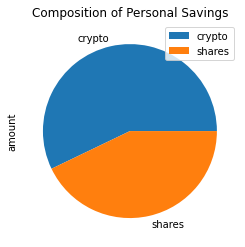

In [185]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [186]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares_value

# Validate saving health
if emergency_fund < total_savings:
    print("Congratulations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
    print("You have reach your financial goal")
else:
    print(f"You are {emergency_fun - total_savings} dollars away from reaching the goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [187]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-30', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-30', tz='America/New_York').isoformat()

In [188]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 500,
).df

df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                           SPY          \
              open      high      low   close     volume    open    high   
2019-05-07  108.63  108.7000  108.585  108.62  2788574.0     NaN     NaN   
2019-05-08  108.74  108.8100  108.550  108.57  5808492.0  287.53  289.43   
2019-05-09  108.78  108.8100  108.550  108.67  4669136.0  285.23  287.33   
2019-05-10  108.74  108.8200  108.630  108.67  4810765.0  285.62  288.94   
2019-05-13  108.83  108.9768  108.815  108.86  5116696.0  282.42  283.49   

                                           
               low     close       volume  
2019-05-07     NaN       NaN          NaN  
2019-05-08  286.87  287.5600   75117753.0  
2019-05-09  283.30  286.7500   90532298.0  
2019-05-10  282.30  288.0300   97407327.0  
2019-05-13  279.93  280.9905  106597028.0

In [189]:
df_stock_data = df_stock_data.dropna()

In [190]:
df_stock_data.isnull().sum()

AGG  open      0
     high      0
     low       0
     close     0
     volume    0
SPY  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [191]:
df_stock_data.head()

AGG                                           SPY          \
              open      high      low   close     volume    open    high   
2019-05-08  108.74  108.8100  108.550  108.57  5808492.0  287.53  289.43   
2019-05-09  108.78  108.8100  108.550  108.67  4669136.0  285.23  287.33   
2019-05-10  108.74  108.8200  108.630  108.67  4810765.0  285.62  288.94   
2019-05-13  108.83  108.9768  108.815  108.86  5116696.0  282.42  283.49   
2019-05-14  108.90  108.9700  108.740  108.94  4976560.0  281.99  285.10   

                                           
               low     close       volume  
2019-05-08  286.87  287.5600   75117753.0  
2019-05-09  283.30  286.7500   90532298.0  
2019-05-10  282.30  288.0300   97407327.0  
2019-05-13  279.93  280.9905  106597028.0  
2019-05-14  281.85  283.3300   68269143.0

In [192]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40, .60], num_simulation = 500, num_trading_days = 252*30)

In [193]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                                        SPY  \
              open      high      low   close     volume daily_return    open   
2019-05-08  108.74  108.8100  108.550  108.57  5808492.0          NaN  287.53   
2019-05-09  108.78  108.8100  108.550  108.67  4669136.0     0.000921  285.23   
2019-05-10  108.74  108.8200  108.630  108.67  4810765.0     0.000000  285.62   
2019-05-13  108.83  108.9768  108.815  108.86  5116696.0     0.001748  282.42   
2019-05-14  108.90  108.9700  108.740  108.94  4976560.0     0.000735  281.99   

                                                                
              high     low     close       volume daily_return  
2019-05-08  289.43  286.87  287.5600   75117753.0          NaN  
2019-05-09  287.33  283.30  286.7500   90532298.0    -0.002817  
2019-05-10  288.94  282.30  288.0300   97407327.0     0.004464  
2019-05-13  283.49  279.93  280.9905  106597028.0    -0.024440  
2019-05-14  285.10  281.85  283.3300   68269143.0     0.008326

In [194]:
MC_even_dist.portfolio_data = MC_even_dist.portfolio_data.dropna()

In [195]:
MC_even_dist.portfolio_data.isnull().sum()

AGG  open            0
     high            0
     low             0
     close           0
     volume          0
     daily_return    0
SPY  open            0
     high            0
     low             0
     close           0
     volume          0
     daily_return    0
dtype: int64

In [196]:
MC_even_dist.portfolio_data.head()

AGG                                                        SPY  \
              open      high      low   close     volume daily_return    open   
2019-05-09  108.78  108.8100  108.550  108.67  4669136.0     0.000921  285.23   
2019-05-10  108.74  108.8200  108.630  108.67  4810765.0     0.000000  285.62   
2019-05-13  108.83  108.9768  108.815  108.86  5116696.0     0.001748  282.42   
2019-05-14  108.90  108.9700  108.740  108.94  4976560.0     0.000735  281.99   
2019-05-15  109.16  109.1800  108.830  109.11  2136097.0     0.001560  281.59   

                                                                
              high     low     close       volume daily_return  
2019-05-09  287.33  283.30  286.7500   90532298.0    -0.002817  
2019-05-10  288.94  282.30  288.0300   97407327.0     0.004464  
2019-05-13  283.49  279.93  280.9905  106597028.0    -0.024440  
2019-05-14  285.10  281.85  283.3300   68269143.0     0.008326  
2019-05-15  285.77  281.36  285.0600   62989430.0     0.006106

In [197]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.979802,0.998600,1.003905,0.988613,0.991596,0.998620,0.988621,0.992123,1.014669,1.017621,...,0.996080,1.005341,0.969728,1.023468,1.013021,1.002447,1.010433,1.001312,0.999560,0.991599
2,0.974909,0.985459,1.009015,1.004281,0.986766,1.002705,0.991871,0.986962,0.991877,1.016831,...,1.007172,1.005460,0.968400,1.040039,1.020589,1.012851,1.009759,0.993139,1.007287,0.992886
3,0.968488,0.973537,0.998417,1.002302,0.979785,1.022876,0.983601,0.993431,0.985394,1.009505,...,1.011671,0.996705,0.970198,1.033750,1.032444,1.002945,1.001023,1.006427,1.026928,0.989741
4,0.964868,0.963066,0.988165,1.002663,0.979175,1.025821,0.982048,0.990451,1.008056,1.001334,...,1.001186,1.007586,0.976469,1.035140,1.037710,1.015763,1.002314,1.012074,1.041145,0.987136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,21.723323,38.796966,44.323903,588.665488,47.129893,61.269891,49.840273,37.845834,151.047780,90.428241,...,81.974499,14.128401,147.023987,37.090892,57.921229,43.617161,38.933112,26.221841,25.269904,268.197530
7557,21.914841,38.581653,44.342113,591.103767,47.324287,60.916989,49.458388,38.007026,150.307852,88.637600,...,81.189957,13.845815,147.841065,37.159845,56.920375,43.852426,38.703628,26.351442,25.144125,272.049264
7558,21.609784,38.745834,44.357961,586.073794,47.945869,60.536276,48.959444,37.496487,152.830038,90.968288,...,81.279678,13.865964,148.420852,36.791167,55.450593,44.199069,38.997751,26.597507,25.061290,277.854042
7559,21.533470,38.740213,45.243379,583.979646,48.279705,61.271544,49.549550,37.690285,151.761889,91.746300,...,81.327338,13.895963,144.720975,37.120800,54.687386,43.986536,38.759306,26.544213,25.016321,280.064760


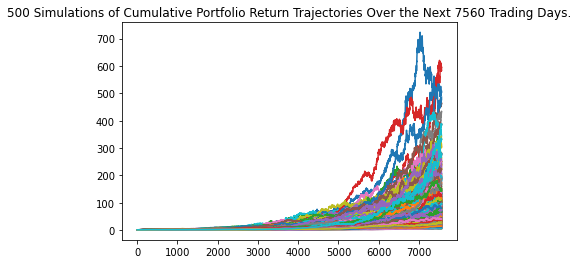

In [198]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

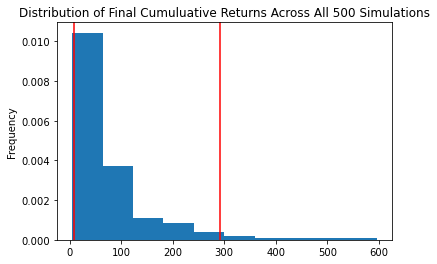

In [199]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [200]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             76.630638
std              81.517142
min               5.057781
25%              27.797450
50%              48.458243
75%              93.546931
max             595.506720
95% CI Lower      9.181157
95% CI Upper    291.785998
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [201]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $183623.13 and $5835719.97


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [202]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
tbl = MC_even_dist.summarize_cumulative_return()
ci_lower = round(tbl[8]*20000*1.5,2)
ci_upper = round(tbl[9]*20000*1.5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $275434.7 and $8753579.95


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [203]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

# Print the simulation input data

In [204]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [210]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [206]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!


In [207]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics


In [211]:
# Set initial investment

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

# Print results


### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")